# Problem Statement: Given a data set of patients, can we predict whether or not they have a heart disease? 

In [1]:
#first lets load the data and explore 
#to do this we need to import several libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\hp\\Desktop\\Reviving python\\Datasets\\heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.shape

(303, 14)

the hearts dataset contains 303 rows and 14 columns. While the data is quite small it will help illustrate the use of ML model in disease prediction. 

Age is the patients age and is an important determinant of heart disease whose prevalence increases with age
Sex - patients gender (1 male;0 female)
Cp - Chest pain also known as angina. there are several types (prinzmetal, angina decubitus, stable, and unstable angina)they all result from insufficient blood pumped to the heart. 
Chol - cholesteral levels  which have are a modifiable risk factor
fbs - fasting blood sugar a modifiable risk factor since high levels are seen in diabetes patients
(1 = true; 0 = false)
Restecg -  Resting electrocardiogram values. This test shows any rythm anormalies

    0: Nothing to note
    1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
thalach - maximum heart rate achieved
exang - excercise induced angina  indicative of stable angina (1 = yes; 0 = no)
slope - the slope of the peak exercise ST segment

    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart

ca -  number of blood vessels through fluoroscopy. indexed 0-3. The more the better as it means blood is flowing better. 
thal - thalium stress test which is a nuclear imaging used to determine how well blood is flowing through vessels. 

    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
target is our predicted variable. 0 for no disease 1 for disease


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
#lets change the column headers to make them clearer
df.columns = ['age','sex','angina','restBP','cholesterol','fasting_bloodsugar', 'restECG', 'maximumHR','excercise_angina','STdepression','ST_slope', 'bloodvessels', 'thaliumtest','target']

In [5]:
df.head()

,age,sex,angina,restBP,cholesterol,fasting_bloodsugar,restECG,maximumHR,excercise_angina,STdepression,ST_slope,bloodvessels,thaliumtest,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.dtypes

age                     int64
sex                     int64
angina                  int64
restBP                  int64
cholesterol             int64
fasting_bloodsugar      int64
restECG                 int64
maximumHR               int64
excercise_angina        int64
STdepression          float64
ST_slope                int64
bloodvessels            int64
thaliumtest             int64
target                  int64
dtype: object

In [7]:
#lets check if our data contains any missing values
df.isnull().sum()

age                   0
sex                   0
angina                0
restBP                0
cholesterol           0
fasting_bloodsugar    0
restECG               0
maximumHR             0
excercise_angina      0
STdepression          0
ST_slope              0
bloodvessels          0
thaliumtest           0
target                0
dtype: int64

great! no missing values, we are good to go


lets get a brief stats about our data

In [8]:
df.describe()

,age,sex,angina,restBP,cholesterol,fasting_bloodsugar,restECG,maximumHR,excercise_angina,STdepression,ST_slope,bloodvessels,thaliumtest,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#lets see the number of patients with and without heart disease
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

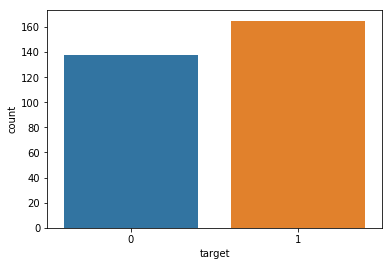

In [10]:
#lets plot for visualization
sns. countplot(df['target'])

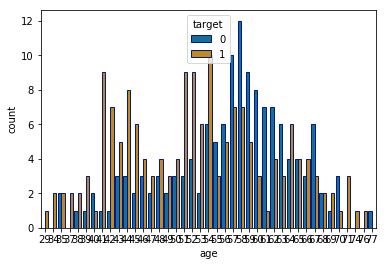

In [11]:
sns.countplot(x = 'age', hue = 'target', data= df, palette = "colorblind", edgecolor = sns.color_palette("dark",n_colors = 1));


In [12]:
df.corr()

,age,sex,angina,restBP,cholesterol,fasting_bloodsugar,restECG,maximumHR,excercise_angina,STdepression,ST_slope,bloodvessels,thaliumtest,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
angina,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
restBP,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_bloodsugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restECG,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
maximumHR,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
excercise_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
STdepression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


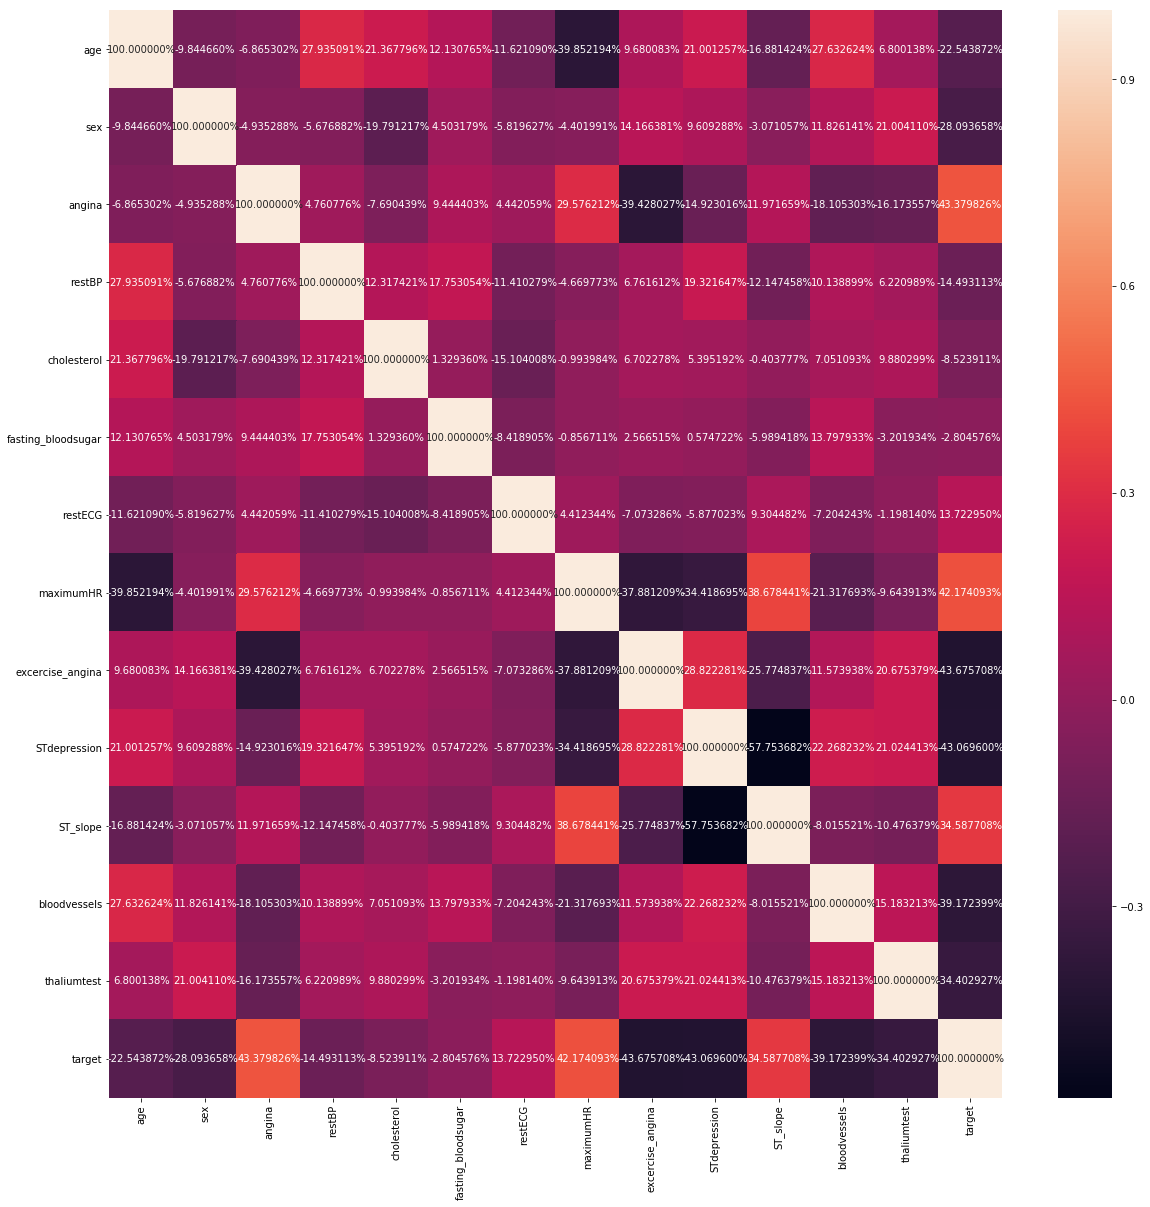

In [13]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True, fmt = '0%')


In [14]:
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting

np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

THE MODEL
We will fit a random forest classifier


In [15]:
#we split the data
X_train, X_test,Y_train, Y_test = train_test_split(df.drop('target', 1), df['target'], test_size = 0.2,random_state=0)

In [16]:
model = RandomForestClassifier(max_depth = 5)
model.fit(X_train, Y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
Y_predict = model.predict(X_test)
Y_pred_quant = model.predict_proba(X_test)[:,1]
Y_pred_bin = model.predict(X_test)


In [18]:
#lets use a confusion matrix to assess the fit 
confusion_matrix =  confusion_matrix (Y_test,Y_pred_bin)
confusion_matrix

array([[21,  6],
       [ 5, 29]], dtype=int64)

The value of a diagnostic test is based on its sensitivity and its specificity. The can be defined as: 

Sensitivity=TruePositives/TruePositives+FalseNegatives

Specificity=TrueNegatives/TrueNegatives+FalsePositives


In [19]:
#lets determine the sensitivity of this model. 
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8076923076923077
Specificity :  0.8285714285714286


our model gives us a 80% sensitivity and 82.8% specificity
no so bad:-)

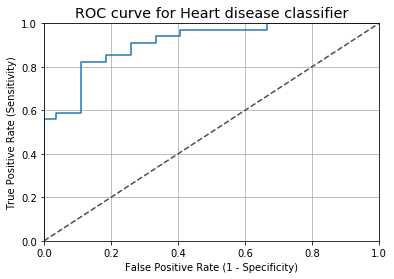

In [20]:
#lets check the Receiver operator curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)



Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

    0.90 - 1.00 = excellent
    0.80 - 0.90 = good
    0.70 - 0.80 = fair
    0.60 - 0.70 = poor
    0.50 - 0.60 = fail

Let's see what the above ROC gives us,


In [21]:
auc(fpr,tpr)

0.9106753812636166

model works great!